Intro

Planned topics to cover:
* Health perception (good / not good) -> Animal phobia (pure / mixed)
* Region of origin -> Animal phobia (Y / N)
* Region of origin -> Animal phobia (pure / mixed)

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import scipy.stats

from global_vars import *
from reference import *


NESARC = r"C:\Users\USER\Documents\Courses\Coursera\dai\datasets\nesarc\nesarc_pds.csv"


# Load data
data = pd.read_csv(NESARC, low_memory=False)

# Convert necessary values to numbers
data[ANIMALS_MAP[CODE]] = pd.to_numeric(data[ANIMALS_MAP[CODE]], errors='coerce')

Create a distinction between pure and mixed animal phobia.

In [2]:
for phobia in ALL_SPECIFIC_PHOBIAS:
    data[phobia[CODE] + '_NEW'] = data[phobia[CODE]].replace([2, 9], 0)
sp_new_list = [entry[CODE] + '_NEW' for entry in ALL_SPECIFIC_PHOBIAS]  # creating a list of names for the new columns
data[APPUREMIXED] = data.loc[:, sp_new_list].sum(axis=1)
condition_for_replace = data[APPUREMIXED] > 1
data.loc[condition_for_replace, APPUREMIXED] = 0  # replace values > 1 with 0
appuremixed_freq = data[data[ANIMALS_MAP[CODE]] == 1][APPUREMIXED].value_counts(sort=False, dropna=False)
appuremixed_percent = data[data[ANIMALS_MAP[CODE]] == 1][APPUREMIXED].value_counts(sort=False, dropna=False, normalize=True)

print('Frequencies, percentages for pure and mixed animal phobia')
print(pd.concat(dict(Frequencies=appuremixed_freq.rename({1: 'Pure', 0: 'Mixed'}),
                     Percentages=appuremixed_percent.rename({1: 'Pure', 0: 'Mixed'})), axis=1))

Frequencies, percentages for pure and mixed animal phobia
       Frequencies  Percentages
Mixed         6836     0.751787
Pure          2257     0.248213


Create subsed for only those with animal phobia.

In [3]:
condition_ap = data[ANIMALS_MAP[CODE]] == 1
subset_ap = data[condition_ap].copy()  # Make a subset of those with animal phobia

Create binary health perception variable

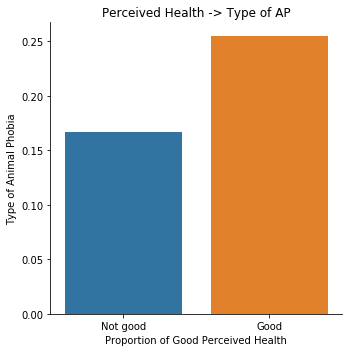

In [4]:
def sort_health(row):
    '''
    Recoding values for perceived health
    :param row: row of a dataset
    :return: code value (int)
    '''
    good = [1, 2, 3, 4]
    if row[HEALTH_MAP[CODE]] in good:
        return 1
    else:
        return 0
    
subset_ap['HEALTHBINARY'] = subset_ap.apply(lambda row: sort_health(row), axis=1)

subset_ap['HEALTHBINARY'] = subset_ap['HEALTHBINARY'].astype('category')
subset_ap['HEALTHBINARY'] = subset_ap['HEALTHBINARY'].cat.rename_categories(['Not good', 'Good'])

seaborn.catplot(x='HEALTHBINARY', y=APPUREMIXED, kind='bar', ci=None, data=subset_ap)
plt.xlabel('Proportion of Good Perceived Health')
plt.ylabel('Type of Animal Phobia')

plt.title('Perceived Health -> Type of AP')
# plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Create contigency table for Perceived Health and Pure/Mixed Animal Phobia.

In [5]:
ph_ap_crosstable = pd.crosstab(subset_ap[APPUREMIXED], subset_ap['HEALTHBINARY'])
print(ph_ap_crosstable)

HEALTHBINARY  Not good  Good
APPUREMIXED                 
0                  565  6271
1                  113  2144


In [6]:
# Get column percentages
col_sum=ph_ap_crosstable.sum(axis=0)  # column sums
col_percent=ph_ap_crosstable / col_sum
print(col_percent)

HEALTHBINARY  Not good      Good
APPUREMIXED                     
0             0.833333  0.745217
1             0.166667  0.254783


Get Chi Square stats.  
Question: If a respondent with animal phobia perceives their health as good, is it reasonable to expect that their animal phobia is pure?
* H<sub>0</sub>: There is no relationship between perceived health and animal phobia.
* H<sub>A</sub>: The two variables are not related.

In [8]:
ph_ap_chisquare = scipy.stats.chi2_contingency(ph_ap_crosstable)
print ('chi-square value, p-value, expected counts')
print (ph_ap_chisquare)

chi-square value, p-value, expected counts
(25.637793619550834, 4.1189268158301394e-07, 1, array([[ 509.71164632, 6326.28835368],
       [ 168.28835368, 2088.71164632]]))


Conclusion retain H<sub>0</sub>: the difference in health perception for the respondents with pure and mixed animal phobia is not significant, i.e. the two variables are not related.

Now for the regions of origin regarding AP. First, on general terms (both, pure and mixed AP).

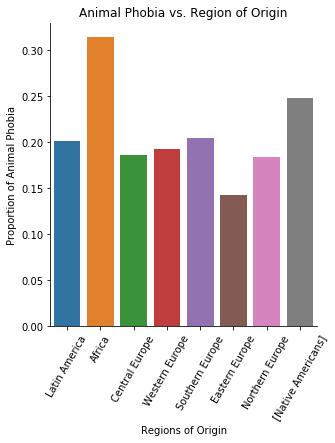

In [16]:
data[ORIGIN_MAP[CODE]] = pd.to_numeric(data[ORIGIN_MAP[CODE]], errors='coerce')

# Make a subset for the most frequent origins
condition_origin = data[ORIGIN_MAP[CODE]].isin(REGIONS)
subset_origin = data[condition_origin].copy()

# Create a column with region names
subset_origin['REGION'] = subset_origin[ORIGIN_MAP[CODE]].map(REGIONS)

subset_origin[ANIMALS_MAP[CODE]] = subset_origin[ANIMALS_MAP[CODE]].replace(9, np.nan)
subset_origin[ANIMALS_MAP[CODE]] = subset_origin[ANIMALS_MAP[CODE]].replace(2, 0)
subset_origin[ANIMALS_MAP[CODE]] = subset_origin[ANIMALS_MAP[CODE]].astype('category')
subset_origin[ANIMALS_MAP[CODE]] = pd.to_numeric(subset_origin[ANIMALS_MAP[CODE]], errors='coerce')

# Bivariate chart: Region of Origin -> Experience of Animal Phobia (both mixed and pure)
seaborn.catplot(x='REGION', y=ANIMALS_MAP[CODE], kind='bar', ci=None, data=subset_origin)
plt.xlabel('Regions of Origin')
plt.ylabel('Proportion of Animal Phobia')
plt.title('Animal Phobia vs. Region of Origin')
plt.xticks(rotation=60)
plt.show()

Create a contigency table for the case.

In [17]:
ro_ap_crosstable = pd.crosstab(subset_origin[ANIMALS_MAP[CODE]], subset_origin['REGION'])
print(ro_ap_crosstable)

REGION  Africa  Central Europe  Eastern Europe  Latin America  \
S8Q1A1                                                          
0.0       5054            5351             348           5298   
1.0       2316            1223              58           1338   

REGION  Northern Europe  Southern Europe  Western Europe  [Native Americans]  
S8Q1A1                                                                        
0.0                 712             1592            7350                 711  
1.0                 161              409            1755                 235  


Get general Chi Square stats.

In [18]:
ro_ap_chisquare = scipy.stats.chi2_contingency(ro_ap_crosstable)
print ('chi-square value, p-value, expected counts')
print (ro_ap_chisquare)

chi-square value, p-value, expected counts
(504.0635623961649, 1.072413740307958e-104, 7, array([[5741.08460382, 5121.01630739,  316.26599039, 5169.31308425,
         680.04977736, 1558.73952405, 7092.61537554,  736.91533721],
       [1628.91539618, 1452.98369261,   89.73400961, 1466.68691575,
         192.95022264,  442.26047595, 2012.38462446,  209.08466279]]))


P-value is very small, which shows that there is a significant difference between some of the results. The next goal, therefore, is to establish where this difference is located.

After the detailed relationship between 